
## SUMMARY
## 
Titanic competition in Kaggle: https://www.kaggle.com/competitions/titanic
## 
In this Titanic dataset demonstration, we follow a systematic six-step process. We start by importing essential libraries for data manipulation and analysis. Next, we thoroughly understand the dataset, examining its structure and statistics. After addressing data quality issues and performing preprocessing tasks, we build an initial predictive model using machine learning algorithms. To enhance the model's performance, we conduct hyperparameter tuning, fine-tuning its parameters. The demonstration culminates in making final predictions on the test dataset, showcasing the effectiveness of the developed model in predicting passenger survival accurately.


## STEP 1: CREATE SPARK SESSION AND IMPORT THE DATASET
- Create a basic SparkSession
- Import the both train and test titanic dataset from databricks cloud

In [0]:
# The entry point into all functionality in Spark is the SparkSession class. To create a basic SparkSession, use SparkSession.builder

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Spark ML example on titanic data ") \
    .getOrCreate()

In [0]:
# Import necessary pyspark functions/features/evaluations

from pyspark.ml import Pipeline
from pyspark.sql import functions as F
from pyspark.sql.functions import mean, split, col, regexp_extract, when, lit
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import QuantileDiscretizer

In [0]:
## IMPORT TRAIN DATASET ##

# File location and type
file_location = "/FileStore/tables/train.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
titanic_train = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(titanic_train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,null,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,null,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,null,S
6,0,3,"Moran, Mr. James",male,null,0,0,330877,8.4583,null,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,null,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,null,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,null,C


In [0]:
# View the first five rows of the training dataset

titanic_train.show(5)

# Which features are categorical?  - Survived, Sex, and Embarked. Ordinal: Pclass.
# Which features are numerical? - Continous: Age, Fare. Discrete: SibSp, Parch.

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+----+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+----+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|  71|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|   7| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|  53| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8| null|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+----+-----+--------+
o

In [0]:
## IMPORT TEST DATASET ##

# File location and type
file_location = "/FileStore/tables/test.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
titanic_test = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(titanic_test)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,null,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,null,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,null,Q
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,null,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,null,S
897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,null,S
898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,null,Q
899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,null,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,null,C
901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,null,S


In [0]:
# View the first five rows of the test dataset

titanic_test.show(5)

+-----------+------+--------------------+------+----+-----+-----+-------+-------+-----+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch| Ticket|   Fare|Cabin|Embarked|
+-----------+------+--------------------+------+----+-----+-----+-------+-------+-----+--------+
|        892|     3|    Kelly, Mr. James|  male|34.5|    0|    0| 330911| 7.8292| null|       Q|
|        893|     3|Wilkes, Mrs. Jame...|female|  47|    1|    0| 363272|      7| null|       S|
|        894|     2|Myles, Mr. Thomas...|  male|  62|    0|    0| 240276| 9.6875| null|       Q|
|        895|     3|    Wirz, Mr. Albert|  male|  27|    0|    0| 315154| 8.6625| null|       S|
|        896|     3|Hirvonen, Mrs. Al...|female|  22|    1|    1|3101298|12.2875| null|       S|
+-----------+------+--------------------+------+----+-----+-----+-------+-------+-----+--------+
only showing top 5 rows




## STEP 2: DATA UNDERSTANDING
##
To gain insights into the dataset, we conduct a comprehensive analysis of its structure, features, and statistical properties. Understanding the dataset is crucial for making informed decisions during subsequent steps. This includes: 
- Examining data types
- Checking for missing values
- Generating descriptive statistics

In [0]:
# Review the schema of train dataset
# As can be seen, the variable types in the dataset are incorrect. 
# For example, 'passengerid' should be of type 'integer' rather than 'string'.
# In conclusion, **we have to change the variable types.**

titanic_train.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: integer (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [0]:
### convert data type

# Convert the 'Survived' column to integer type in the Titanic training dataset
titanic_train = titanic_train.withColumn("Survived", col("Survived").cast("int"))

# Convert the 'Age' column to integer type in the Titanic training dataset
titanic_train = titanic_train.withColumn("Age", col("Age").cast("int"))

# Convert the 'Pclass' column to integer type in the Titanic training dataset
titanic_train = titanic_train.withColumn("Pclass", col("Pclass").cast("int"))

# Convert the 'SibSp' column to integer type in the Titanic training dataset
titanic_train = titanic_train.withColumn("SibSp", col("SibSp").cast("int"))

# Convert the 'Parch' column to integer type in the Titanic training dataset
titanic_train = titanic_train.withColumn("Parch", col("Parch").cast("int"))

# Convert the 'Fare' column to integer type in the Titanic training dataset
titanic_train = titanic_train.withColumn("Fare", col("Fare").cast("int"))

In [0]:
# Display basic statistics of numerical columns

titanic_train.describe().show()

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                null|  null|29.679271708683473|0.5230078563411896|0.38159371492704824|260318.54916792738|31.785634

In [0]:
## CHECKING NULL VALUES ##

# Define a function to calculate the count of null values in each column of a DataFrame
def null_value_count(df):
    # Initialize an empty list to store tuples containing column names and their respective null value counts
    null_columns_counts = []

    # Get the total number of rows in the DataFrame
    numRows = df.count()

    # Iterate over each column in the DataFrame
    for k in df.columns:
        # Count the number of null rows in the current column
        nullRows = df.where(col(k).isNull()).count()

        # Check if there are any null values in the column
        if nullRows > 0:
            # Create a tuple containing the column name and its null value count, and add it to the list
            temp = k, nullRows
            null_columns_counts.append(temp)

    # Return the list of tuples containing column names and their respective null value counts
    return null_columns_counts

In [0]:
# Call the previously defined function to calculate the count of null values for each column in the 'titanic_train' DataFrame
null_columns_count_list = null_value_count(titanic_train)

In [0]:
# Create a Spark DataFrame from the list of tuples containing column names and their respective null value counts
# The DataFrame will have columns named 'Column_With_Null_Value' and 'Null_Values_Count'

spark.createDataFrame(null_columns_count_list, ['Column_With_Null_Value', 'Null_Values_Count']).show()

+----------------------+-----------------+
|Column_With_Null_Value|Null_Values_Count|
+----------------------+-----------------+
|                   Age|              177|
|                 Cabin|              687|
|              Embarked|                2|
+----------------------+-----------------+



In [0]:
# How many Passengers Survived?
# Out of the 891 passengers in the dataset, only approximately 342 survived (1)
# To gain deeper insights from the data, it is essential to delve further into the details and identify the specific categories of passengers who survived and those who did not.
# We aim to examine the survival rate by exploring various features of the dataset, including but not limited to sex, port of embarkation, age, etc.

titanic_train.groupBy("Survived").count().show()

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  342|
|       0|  549|
+--------+-----+



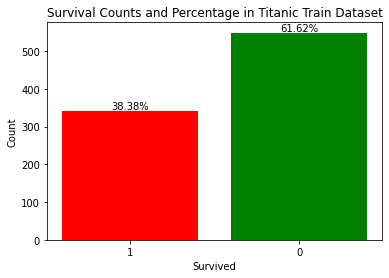

In [0]:
## Visualize the survival rate ##

# Import matplotlib 
import matplotlib.pyplot as plt

# Show the survival rate
survival_counts = titanic_train.groupBy("Survived").count().collect()

# Extract values for plotting
labels = [str(row["Survived"]) for row in survival_counts]
counts = [row["count"] for row in survival_counts]

# Calculate percentages
total_passengers = sum(counts)
percentages = [count / total_passengers * 100 for count in counts]

# Create a bar plot using Matplotlib
plt.bar(labels, counts, color=['red', 'green'])

# Add percentage labels above each bar
for label, count, percentage in zip(labels, counts, percentages):
    plt.text(label, count + 5, f"{percentage:.2f}%", ha='center')

plt.title("Survival Counts and Percentage in Titanic Train Dataset")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [0]:
## Review the correlation between 'Pclass' and 'Survived' ##

# We can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue.

result_df = titanic_train.select("Pclass", "Survived").groupBy("Pclass").agg(F.mean("Survived").alias("survival_rate"))
result_df = result_df.sort("survival_rate", ascending=False)
result_df.show()

+------+-------------------+
|Pclass|      survival_rate|
+------+-------------------+
|     1| 0.6296296296296297|
|     2|0.47282608695652173|
|     3|0.24236252545824846|
+------+-------------------+



In [0]:
## Review the correlation between 'Sex' and 'Survived' ##

# women saved rate is much more than male.

result_df2 = titanic_train.select("Sex", "Survived").groupBy("Sex").agg(F.mean("Survived").alias("survival_rate"))
result_df2 = result_df2.sort("survival_rate", ascending=False)
result_df2.show()

+------+-------------------+
|   Sex|      survival_rate|
+------+-------------------+
|female| 0.7420382165605095|
|  male|0.18890814558058924|
+------+-------------------+



In [0]:
## Review the correlation between 'SibSp' and 'Survived' ##

#  low correlation with survived, it may be best to derive a feature or a set of features from these individual features

result_df3 = titanic_train.select("SibSp", "Survived").groupBy("SibSp").agg(F.mean("Survived").alias("survival_rate"))
result_df3 = result_df3.sort("survival_rate", ascending=False)
result_df3.show()

+-----+-------------------+
|SibSp|      survival_rate|
+-----+-------------------+
|    1| 0.5358851674641149|
|    2| 0.4642857142857143|
|    0|0.34539473684210525|
|    3|               0.25|
|    4|0.16666666666666666|
|    5|                0.0|
|    8|                0.0|
+-----+-------------------+



In [0]:
## Review the correlation between 'Parch' and 'Survived' ##

# low correlation with survived, it may be best to derive a feature or a set of features from these individual features

result_df4 = titanic_train.select("Parch", "Survived").groupBy("Parch").agg(F.mean("Survived").alias("survival_rate"))
result_df4 = result_df4.sort("survival_rate", ascending=False)
result_df4.show()

+-----+-------------------+
|Parch|      survival_rate|
+-----+-------------------+
|    3|                0.6|
|    1| 0.5508474576271186|
|    2|                0.5|
|    0|0.34365781710914456|
|    5|                0.2|
|    6|                0.0|
|    4|                0.0|
+-----+-------------------+



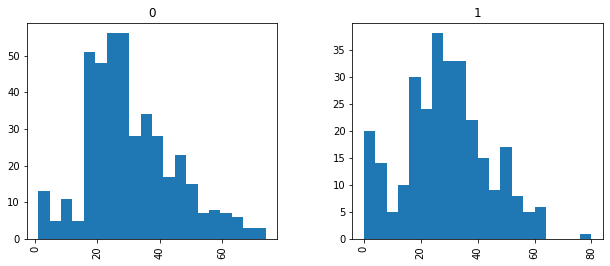

In [0]:
## Review the correlation between 'Age' and 'Survived' ##

# Infants (age <=4) had high survival rate.
# Oldest passengers (age = 80) survived.
# Large number of 15-25 year olds did not survive.
# Most passengers are in 15-35 age range.

age_survived_df = titanic_train.select("Age", "Survived")
age_survived_df = age_survived_df.withColumn("Survived", age_survived_df["Survived"].cast("int"))
age_survived_df.toPandas().hist(column='Age', by='Survived', bins=20, figsize=(10, 4))

plt.show()


## STEP 3.1: DATA PROCESSING WITH TRAINING DATASET
In this step, we address any data quality issues identified during the data understanding phase. This involves:
- Handling missing values
- Encoding categorical variables

Additionally, we may explore feature engineering techniques to create new meaningful features that enhance the model's predictive capabilities.

In [0]:
## Review the correlation between 'Family_Size', 'SibSp' and 'Survived' ##
# We can create a new feature called "Family_size" and "Alone" and analyse it. 
# This feature is the summation of Parch(parents/children) and SibSp(siblings/spouses). 
# It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers

# Create a new column 'Family_Size' in the 'titanic_train' DataFrame by adding 'SibSp' and 'Parch'
titanic_train = titanic_train.withColumn("Family_Size",col('SibSp')+col('Parch'))

# Display a summary table showing the count of occurrences for each value in the 'Family_Size' column
titanic_train.groupBy("Family_Size").count().show()

+-----------+-----+
|Family_Size|count|
+-----------+-----+
|          1|  161|
|          6|   12|
|          3|   29|
|          5|   22|
|          4|   15|
|          7|    6|
|         10|    7|
|          2|  102|
|          0|  537|
+-----------+-----+



In [0]:
# Create a new column 'Alone' in the 'titanic_train' DataFrame and initialize it with the value 0
titanic_train = titanic_train.withColumn('Alone', lit(0))

# Update the 'Alone' column based on the condition that 'Family_Size' is 0, assigning 1 for alone and keeping the existing values
titanic_train = titanic_train.withColumn("Alone", when(titanic_train["Family_Size"] == 0, 1).otherwise(titanic_train["Alone"]))

titanic_train.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+----+-----+--------+-----------+-----+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|Fare|Cabin|Embarked|Family_Size|Alone|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+----+-----+--------+-----------+-----+
|          1|       0|     3|Braund, Mr. Owen ...|  male|  22|    1|    0|       A/5 21171|   7| null|       S|          1|    0|
|          2|       1|     1|Cumings, Mrs. Joh...|female|  38|    1|    0|        PC 17599|  71|  C85|       C|          1|    0|
|          3|       1|     3|Heikkinen, Miss. ...|female|  26|    0|    0|STON/O2. 3101282|   7| null|       S|          0|    1|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|  35|    1|    0|          113803|  53| C123|       S|          1|    0|
|          5|       0|     3|Allen, Mr. Willia...|  male|  35|    0|    0|          373450

In [0]:
## MISSING VALUE IMPUTATION ##
# 'Age' has 177 missing values
# To replace these missing values, we can assign them the mean age of the dataset.
# But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years.
# We can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups

mean_age = titanic_train.select(mean('Age')).collect()[0][0]
print(mean_age)

29.679271708683473


In [0]:
# Deal with the 'Name' columns to impute missing value in 'age' column
# Extract titles from the 'Name' column using a regular expression and create a new column 'Initial' with the extracted values
titanic_train = titanic_train.withColumn("Initial", regexp_extract(col("Name"),"([A-Za-z]+)\.",1))

# Display distinct values in the 'Initial' column of the 'titanic_train' DataFrame
titanic_train.select("Initial").distinct().show()

+--------+
| Initial|
+--------+
|     Don|
|    Miss|
|Countess|
|     Col|
|     Rev|
|    Lady|
|  Master|
|     Mme|
|    Capt|
|      Mr|
|      Dr|
|     Mrs|
|     Sir|
|Jonkheer|
|    Mlle|
|   Major|
|      Ms|
+--------+



In [0]:
# Replace specific titles in the 'Initial' column with more common or appropriate titles in the 'titanic_train' DataFrame

titanic_train = titanic_train.replace(['Mlle','Mme', 'Ms', 'Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
               ['Miss','Miss','Miss','Mr','Mr',  'Mrs',  'Mrs',  'Other',  'Other','Other','Mr','Mr','Mr'])

# Re-check distinct values in the 'Initial' column of the 'titanic_train' DataFrame
titanic_train.select("Initial").distinct().show()

+-------+
|Initial|
+-------+
|   Miss|
|  Other|
| Master|
|     Mr|
|    Mrs|
+-------+



In [0]:
# Group the 'titanic_train' DataFrame by the 'Initial' column and calculate the average age for each group
# The result is collected and displayed

titanic_train.groupby('Initial').avg('Age').collect()

Out[119]: [Row(Initial='Miss', avg(Age)=21.84),
 Row(Initial='Other', avg(Age)=45.888888888888886),
 Row(Initial='Master', avg(Age)=4.472222222222222),
 Row(Initial='Mr', avg(Age)=32.72127139364303),
 Row(Initial='Mrs', avg(Age)=35.981818181818184)]

In [0]:
# Impute missing 'Age' values based on 'Initial' title groups in the 'titanic_train' DataFrame

titanic_train = titanic_train.withColumn("Age",when((titanic_train["Initial"] == "Miss") & (titanic_train["Age"].isNull()), 22).otherwise(titanic_train["Age"]))
titanic_train = titanic_train.withColumn("Age",when((titanic_train["Initial"] == "Other") & (titanic_train["Age"].isNull()), 46).otherwise(titanic_train["Age"]))
titanic_train = titanic_train.withColumn("Age",when((titanic_train["Initial"] == "Master") & (titanic_train["Age"].isNull()), 5).otherwise(titanic_train["Age"]))
titanic_train = titanic_train.withColumn("Age",when((titanic_train["Initial"] == "Mr") & (titanic_train["Age"].isNull()), 33).otherwise(titanic_train["Age"]))
titanic_train = titanic_train.withColumn("Age",when((titanic_train["Initial"] == "Mrs") & (titanic_train["Age"].isNull()), 36).otherwise(titanic_train["Age"]))

In [0]:
# Impute missing 'Embarked' column. Embarked feature has only two missing values
# Display a summary table showing the count of occurrences for each value in the 'Embarked' column
titanic_train.groupBy("Embarked").count().show()

+--------+-----+
|Embarked|count|
+--------+-----+
|       Q|   77|
|    null|    2|
|       C|  168|
|       S|  644|
+--------+-----+



In [0]:
# Majority Passengers boarded from "S". We can impute with "S"
# Fill missing values in the 'Embarked' column with the value 'S' in the 'titanic_train' DataFrame
titanic_train = titanic_train.na.fill({"Embarked" : 'S'})

In [0]:
# We can drop Cabin features as it has lots of null values
# Drop the 'Cabin' column from the 'titanic_train' DataFrame
titanic_train = titanic_train.drop("Cabin")

In [0]:
# Convert Embarked, Initial columns from string to number using StringIndexer

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(titanic_train) for column in ["Sex", "Embarked","Initial"]]
pipeline = Pipeline(stages=indexers)
titanic_train = pipeline.fit(titanic_train).transform(titanic_train)

In [0]:
# Drop columns which are not required

titanic_train = titanic_train.drop("PassengerId","Name","Ticket","Cabin","Embarked","Sex","Initial")

titanic_train.show()

+--------+------+---+-----+-----+----+-----------+-----+---------+--------------+-------------+
|Survived|Pclass|Age|SibSp|Parch|Fare|Family_Size|Alone|Sex_index|Embarked_index|Initial_index|
+--------+------+---+-----+-----+----+-----------+-----+---------+--------------+-------------+
|       0|     3| 22|    1|    0|   7|          1|    0|      0.0|           0.0|          0.0|
|       1|     1| 38|    1|    0|  71|          1|    0|      1.0|           1.0|          2.0|
|       1|     3| 26|    0|    0|   7|          0|    1|      1.0|           0.0|          1.0|
|       1|     1| 35|    1|    0|  53|          1|    0|      1.0|           0.0|          2.0|
|       0|     3| 35|    0|    0|   8|          0|    1|      0.0|           0.0|          0.0|
|       0|     3| 33|    0|    0|   8|          0|    1|      0.0|           2.0|          0.0|
|       0|     1| 54|    0|    0|  51|          0|    1|      0.0|           0.0|          0.0|
|       0|     3|  2|    3|    1|  21|  


## STEP 3.2: DATA PROCESSING WITH TEST DATASET
Moving on to the test dataset, the process starts with importing the required libraries, ensuring consistency with the train dataset processing. Data understanding is revisited to assess the structure and features of the test dataset. We apply the same preprocessing steps used on the train dataset, such as handling missing values and encoding categorical variables, ensuring compatibility with the trained model. Finally, the optimized model is employed to make predictions on the test dataset, completing the data processing pipeline and demonstrating the model's generalization to new, unseen data.

In [0]:
# Review the schema of test dataset
titanic_test.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Pclass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [0]:
# Convert the 'Age' column to integer type in the Titanic test dataset
titanic_test = titanic_test.withColumn("Age", col("Age").cast("int"))

# Convert the 'Pclass' column to integer type in the Titanic test dataset
titanic_test = titanic_test.withColumn("Pclass", col("Pclass").cast("int"))

# Convert the 'SibSp' column to integer type in the Titanic test dataset
titanic_test = titanic_test.withColumn("SibSp", col("SibSp").cast("int"))

# Convert the 'Parch' column to integer type in the Titanic test dataset
titanic_test = titanic_test.withColumn("Parch", col("Parch").cast("int"))

# Convert the 'Fare' column to integer type in the Titanic test dataset
titanic_test = titanic_test.withColumn("Fare", col("Fare").cast("int"))

In [0]:
# Review the missing values of test dataset
null_columns_count_list_test = null_value_count(titanic_test)
spark.createDataFrame(null_columns_count_list_test, ['Column_With_Null_Value', 'Null_Values_Count']).show()

+----------------------+-----------------+
|Column_With_Null_Value|Null_Values_Count|
+----------------------+-----------------+
|                   Age|               86|
|                  Fare|                1|
|                 Cabin|              327|
+----------------------+-----------------+



In [0]:
## MISSING VALUE IMPUTATION ##
# 'Age' has 86 missing values

In [0]:
# Deal with the 'Name' columns to impute missing value in 'age' column
# Extract titles from the 'Name' column using a regular expression and create a new column 'Initial' with the extracted values
titanic_test = titanic_test.withColumn("Initial", regexp_extract(col("Name"),"([A-Za-z]+)\.",1))

# Display distinct values in the 'Initial' column of the 'titanic_test' DataFrame
titanic_test.select("Initial").distinct().show()

+-------+
|Initial|
+-------+
|   Dona|
|   Miss|
|    Col|
|    Rev|
| Master|
|     Mr|
|     Dr|
|    Mrs|
|     Ms|
+-------+



In [0]:
# Replace specific titles in the 'Initial' column with more common or appropriate titles in the 'titanic_test' DataFrame
titanic_test = titanic_test.replace(['Mlle','Mme', 'Ms', 'Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Dona'],
               ['Miss','Miss','Miss','Mr','Mr',  'Mrs', 'Mrs',  'Other',  'Other','Other','Mr','Mr','Mr'])

# Re-check distinct values in the 'Initial' column of the 'titanic_test' DataFrame
titanic_test.select("Initial").distinct().show()

+-------+
|Initial|
+-------+
|   Miss|
|  Other|
| Master|
|     Mr|
|    Mrs|
+-------+



In [0]:
# Impute missing 'Age' values based on 'Initial' title groups in the 'titanic_test' DataFrame

titanic_test = titanic_test.withColumn("Age",when((titanic_test["Initial"] == "Miss") & (titanic_test["Age"].isNull()), 22).otherwise(titanic_test["Age"]))
titanic_test = titanic_test.withColumn("Age",when((titanic_test["Initial"] == "Other") & (titanic_test["Age"].isNull()), 46).otherwise(titanic_test["Age"]))
titanic_test = titanic_test.withColumn("Age",when((titanic_test["Initial"] == "Master") & (titanic_test["Age"].isNull()), 5).otherwise(titanic_test["Age"]))
titanic_test = titanic_test.withColumn("Age",when((titanic_test["Initial"] == "Mr") & (titanic_test["Age"].isNull()), 33).otherwise(titanic_test["Age"]))
titanic_test = titanic_test.withColumn("Age",when((titanic_test["Initial"] == "Mrs") & (titanic_test["Age"].isNull()), 36).otherwise(titanic_test["Age"]))

In [0]:
# One missing value in 'Fare' column
# Impute missing 'Fare' values based on its mean in the 'titanic_test' DataFrame

# Calculate the mean fare value for imputation in the 'titanic_test' DataFrame
mean_fare_value = titanic_test.agg(mean('fare')).collect()[0][0]

# Display the calculated mean fare value
mean_fare_value

# Fill missing values in the 'fare' column with the calculated mean fare value in the 'titanic_test' DataFrame
titanic_test = titanic_test.fillna(mean_fare_value, subset=['fare'])

In [0]:
# We can drop Cabin features as it has lots of null values

# Drop the 'Cabin' column from the 'titanic_test' DataFrame
titanic_test = titanic_test.drop("Cabin")

In [0]:
# Create a new feature called "Family_size" and "Alone" same as the training dataset. 
# Create a new column 'Family_Size' in the 'titanic_train' DataFrame by adding 'SibSp' and 'Parch'
titanic_test = titanic_test.withColumn("Family_Size",col('SibSp')+col('Parch'))

# Display a summary table showing the count of occurrences for each value in the 'Family_Size' column
titanic_test.groupBy("Family_Size").count().show()

+-----------+-----+
|Family_Size|count|
+-----------+-----+
|          1|   74|
|          6|    4|
|          3|   14|
|          5|    3|
|          4|    7|
|          7|    2|
|         10|    4|
|          2|   57|
|          0|  253|
+-----------+-----+



In [0]:
# Create a new column 'Alone' in the 'titanic_train' DataFrame and initialize it with the value 0
titanic_test = titanic_test.withColumn('Alone',lit(0))

# Update the 'Alone' column based on the condition that 'Family_Size' is 0, assigning 1 for alone and keeping the existing values
titanic_test = titanic_test.withColumn("Alone",when(titanic_test["Family_Size"] == 0, 1).otherwise(titanic_test["Alone"]))

titanic_test.show()

+-----------+------+--------------------+------+---+-----+-----+----------------+----+--------+-------+-----------+-----+
|PassengerId|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|Fare|Embarked|Initial|Family_Size|Alone|
+-----------+------+--------------------+------+---+-----+-----+----------------+----+--------+-------+-----------+-----+
|        892|     3|    Kelly, Mr. James|  male| 34|    0|    0|          330911|   7|       Q|     Mr|          0|    1|
|        893|     3|Wilkes, Mrs. Jame...|female| 47|    1|    0|          363272|   7|       S|    Mrs|          1|    0|
|        894|     2|Myles, Mr. Thomas...|  male| 62|    0|    0|          240276|   9|       Q|     Mr|          0|    1|
|        895|     3|    Wirz, Mr. Albert|  male| 27|    0|    0|          315154|   8|       S|     Mr|          0|    1|
|        896|     3|Hirvonen, Mrs. Al...|female| 22|    1|    1|         3101298|  12|       S|    Mrs|          2|    0|
|        897|     3|Sven

In [0]:
# Convert Sex, Embarked, Initial columns from string to number using StringIndexer
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(titanic_test) for column in ["Sex","Embarked","Initial"]]
pipeline = Pipeline(stages=indexers)
titanic_test = pipeline.fit(titanic_test).transform(titanic_test)

In [0]:
# Drop columns which are not required
titanic_test = titanic_test.drop("PassengerId","Name","Ticket","Cabin","Embarked","Sex","Initial")

titanic_test.show()

+------+---+-----+-----+----+-----------+-----+---------+--------------+-------------+
|Pclass|Age|SibSp|Parch|Fare|Family_Size|Alone|Sex_index|Embarked_index|Initial_index|
+------+---+-----+-----+----+-----------+-----+---------+--------------+-------------+
|     3| 34|    0|    0|   7|          0|    1|      0.0|           2.0|          0.0|
|     3| 47|    1|    0|   7|          1|    0|      1.0|           0.0|          2.0|
|     2| 62|    0|    0|   9|          0|    1|      0.0|           2.0|          0.0|
|     3| 27|    0|    0|   8|          0|    1|      0.0|           0.0|          0.0|
|     3| 22|    1|    1|  12|          2|    0|      1.0|           0.0|          2.0|
|     3| 14|    0|    0|   9|          0|    1|      0.0|           0.0|          0.0|
|     3| 30|    0|    0|   7|          0|    1|      1.0|           2.0|          1.0|
|     2| 26|    1|    1|  29|          2|    0|      0.0|           0.0|          0.0|
|     3| 18|    0|    0|   7|          0|  


## STEP 4: MODELLING
Using a machine learning algorithm, we build an initial predictive model based on the preprocessed dataset. We choose algorithms such as logistics regression, decision trees, random forests, support vector machines, Gradient-boosted tree classifier depending on the nature of the problem and the characteristics of the dataset. The goal is to create a baseline model that we can later refine for better performance.

In [0]:
# Create a VectorAssembler to combine the input features into a single feature vector column named "features"
feature = VectorAssembler(inputCols=titanic_train.columns[1:], outputCol="features")

# Transform the 'titanic_train' DataFrame using the VectorAssembler to create a new DataFrame with the added "features" column
feature_vector_training = feature.transform(titanic_train)

# Display the resulting DataFrame with the added "features" column
feature_vector_training.show()

+--------+------+---+-----+-----+----+-----------+-----+---------+--------------+-------------+--------------------+
|Survived|Pclass|Age|SibSp|Parch|Fare|Family_Size|Alone|Sex_index|Embarked_index|Initial_index|            features|
+--------+------+---+-----+-----+----+-----------+-----+---------+--------------+-------------+--------------------+
|       0|     3| 22|    1|    0|   7|          1|    0|      0.0|           0.0|          0.0|(10,[0,1,2,4,5],[...|
|       1|     1| 38|    1|    0|  71|          1|    0|      1.0|           1.0|          2.0|[1.0,38.0,1.0,0.0...|
|       1|     3| 26|    0|    0|   7|          0|    1|      1.0|           0.0|          1.0|[3.0,26.0,0.0,0.0...|
|       1|     1| 35|    1|    0|  53|          1|    0|      1.0|           0.0|          2.0|[1.0,35.0,1.0,0.0...|
|       0|     3| 35|    0|    0|   8|          0|    1|      0.0|           0.0|          0.0|(10,[0,1,4,6],[3....|
|       0|     3| 33|    0|    0|   8|          0|    1|      0.

In [0]:
# Create a VectorAssembler to combine the input features into a single feature vector column named "features"
feature = VectorAssembler(inputCols=titanic_test.columns[0:], outputCol="features")

# Transform the 'titanic_train' DataFrame using the VectorAssembler to create a new DataFrame with the added "features" column
feature_vector_test = feature.transform(titanic_test)

# Display the resulting DataFrame with the added "features" column
feature_vector_test.show()

+------+---+-----+-----+----+-----------+-----+---------+--------------+-------------+--------------------+
|Pclass|Age|SibSp|Parch|Fare|Family_Size|Alone|Sex_index|Embarked_index|Initial_index|            features|
+------+---+-----+-----+----+-----------+-----+---------+--------------+-------------+--------------------+
|     3| 34|    0|    0|   7|          0|    1|      0.0|           2.0|          0.0|(10,[0,1,4,6,8],[...|
|     3| 47|    1|    0|   7|          1|    0|      1.0|           0.0|          2.0|[3.0,47.0,1.0,0.0...|
|     2| 62|    0|    0|   9|          0|    1|      0.0|           2.0|          0.0|(10,[0,1,4,6,8],[...|
|     3| 27|    0|    0|   8|          0|    1|      0.0|           0.0|          0.0|(10,[0,1,4,6],[3....|
|     3| 22|    1|    1|  12|          2|    0|      1.0|           0.0|          2.0|[3.0,22.0,1.0,1.0...|
|     3| 14|    0|    0|   9|          0|    1|      0.0|           0.0|          0.0|(10,[0,1,4,6],[3....|
|     3| 30|    0|    0|   7

In [0]:
# Rename the two dataset

titanic_train = feature_vector_training
titanic_test = feature_vector_test

In [0]:
# Splitting data into training and validation sets

(trainData, valData) = titanic_train.randomSplit([0.8, 0.2],seed = 11)

In [0]:
# LogisticRegression

from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Survived", featuresCol="features")

# Training algo
lrModel = lr.fit(trainData)
lr_prediction = lrModel.transform(valData)
lr_prediction.select("prediction", "Survived", "features").show()
evaluator = MulticlassClassificationEvaluator(labelCol="Survived", predictionCol="prediction", metricName="accuracy")

+----------+--------+--------------------+
|prediction|Survived|            features|
+----------+--------+--------------------+
|       1.0|       0|(10,[0,1,4,6,8],[...|
|       1.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,6],[1.0,...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       1.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,2,4,5],[...|
|       1.0|       0|(10,[0,1,3,4,5],[...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|[1.0,58.0,0.0,2.0...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|[2.0,19.0,1.0,1.0...|
+----------

In [0]:
# Evaluate the LogisticRegression

lr_accuracy = evaluator.evaluate(lr_prediction)
print("Accuracy of LogisticRegression is = %g"% (lr_accuracy))
print("Test Error of LogisticRegression = %g " % (1.0 - lr_accuracy))

Accuracy of LogisticRegression is = 0.797872
Test Error of LogisticRegression = 0.202128 


In [0]:
# DecisionTreeClassifier

from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="Survived", featuresCol="features")

# Training algo
dt_model = dt.fit(trainData)
dt_prediction = dt_model.transform(valData)
dt_prediction.select("prediction", "Survived", "features").show()

+----------+--------+--------------------+
|prediction|Survived|            features|
+----------+--------+--------------------+
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,6],[1.0,...|
|       1.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,3,4,5],[...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|[1.0,58.0,0.0,2.0...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|[2.0,19.0,1.0,1.0...|
+----------

In [0]:
# Evaluate DecisionTreeClassifier
dt_accuracy = evaluator.evaluate(dt_prediction)
print("Accuracy of DecisionTreeClassifier is = %g"% (dt_accuracy))
print("Test Error of DecisionTreeClassifier = %g " % (1.0 - dt_accuracy))

Accuracy of DecisionTreeClassifier is = 0.835106
Test Error of DecisionTreeClassifier = 0.164894 


In [0]:
# RandomForestClassifier

from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="Survived", featuresCol="features")

# Training algo
rf_model = rf.fit(trainData)
rf_prediction = rf_model.transform(valData)
rf_prediction.select("prediction", "Survived", "features").show()

+----------+--------+--------------------+
|prediction|Survived|            features|
+----------+--------+--------------------+
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,6],[1.0,...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,3,4,5],[...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|[1.0,58.0,0.0,2.0...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|[2.0,19.0,1.0,1.0...|
+----------

In [0]:
# Evaluate RandomForestClassifier

rf_accuracy = evaluator.evaluate(rf_prediction)
print("Accuracy of RandomForestClassifier is = %g"% (rf_accuracy))
print("Test Error of RandomForestClassifier  = %g " % (1.0 - rf_accuracy))

Accuracy of RandomForestClassifier is = 0.840426
Test Error of RandomForestClassifier  = 0.159574 


In [0]:
# Gradient-boosted tree classifier

from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="Survived", featuresCol="features",maxIter=10)

# Training algo
gbt_model = gbt.fit(trainData)
gbt_prediction = gbt_model.transform(valData)
gbt_prediction.select("prediction", "Survived", "features").show()

+----------+--------+--------------------+
|prediction|Survived|            features|
+----------+--------+--------------------+
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       1.0|       0|(10,[0,1,4,6],[1....|
|       1.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       1.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,6],[1.0,...|
|       1.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       1.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,3,4,5],[...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|[1.0,58.0,0.0,2.0...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|[2.0,19.0,1.0,1.0...|
+----------

In [0]:
# Evaluate Gradient-boosted

gbt_accuracy = evaluator.evaluate(gbt_prediction)
print("Accuracy of Gradient-boosted tree classifie is = %g"% (gbt_accuracy))
print("Test Error of Gradient-boosted tree classifie %g"% (1.0 - gbt_accuracy))

Accuracy of Gradient-boosted tree classifie is = 0.81383
Test Error of Gradient-boosted tree classifie 0.18617


In [0]:
# NaiveBayes

from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(labelCol="Survived", featuresCol="features")

# Training algo
nb_model = nb.fit(trainData)
nb_prediction = nb_model.transform(valData)
nb_prediction.select("prediction", "Survived", "features").show()

+----------+--------+--------------------+
|prediction|Survived|            features|
+----------+--------+--------------------+
|       1.0|       0|(10,[0,1,4,6,8],[...|
|       1.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       1.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       1.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,6],[1.0,...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       1.0|       0|(10,[0,1,4,6],[1....|
|       1.0|       0|(10,[0,1,4,6],[1....|
|       1.0|       0|(10,[0,1,2,4,5],[...|
|       1.0|       0|(10,[0,1,3,4,5],[...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       1.0|       0|[1.0,58.0,0.0,2.0...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       1.0|       0|[2.0,19.0,1.0,1.0...|
+----------

In [0]:
# Evaluate NaiveBayes

nb_accuracy = evaluator.evaluate(nb_prediction)
print("Accuracy of NaiveBayes is  = %g"% (nb_accuracy))
print("Test Error of NaiveBayes  = %g " % (1.0 - nb_accuracy))

Accuracy of NaiveBayes is  = 0.75
Test Error of NaiveBayes  = 0.25 


In [0]:
# Support Vector Machine

from pyspark.ml.classification import LinearSVC
svm = LinearSVC(labelCol="Survived", featuresCol="features")

# Training algo
svm_model = svm.fit(trainData)
svm_prediction = svm_model.transform(valData)
svm_prediction.select("prediction", "Survived", "features").show()

+----------+--------+--------------------+
|prediction|Survived|            features|
+----------+--------+--------------------+
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,6],[1.0,...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,2,4,5],[...|
|       0.0|       0|(10,[0,1,3,4,5],[...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|[1.0,58.0,0.0,2.0...|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6],[1....|
|       0.0|       0|(10,[0,1,4,6,8],[...|
|       0.0|       0|[2.0,19.0,1.0,1.0...|
+----------

In [0]:
# Evaluate Support Vector Machine

svm_accuracy = evaluator.evaluate(svm_prediction)
print("Accuracy of Support Vector Machine is = %g"% (svm_accuracy))
print("Test Error of Support Vector Machine = %g " % (1.0 - svm_accuracy))

Accuracy of Support Vector Machine is = 0.829787
Test Error of Support Vector Machine = 0.170213 


In [0]:
# Create a table to save Accuracy score from all the models

model_names = ["SVM", "NaiveBayes", "GBT", "RandomForest", "DecisionTree", "LogisticRegression"]
accuracy_scores = [svm_accuracy, nb_accuracy, gbt_accuracy, rf_accuracy, dt_accuracy, lr_accuracy]

from pyspark.sql import Row
from pyspark.sql.functions import desc

data = [Row(Model=model, Accuracy=accuracy) for model, accuracy in zip(model_names, accuracy_scores)]
titanic_result = spark.createDataFrame(data)
titanic_result = titanic_result.sort(desc("Accuracy"))
titanic_result.show()

+------------------+------------------+
|             Model|          Accuracy|
+------------------+------------------+
|      RandomForest|0.8404255319148937|
|      DecisionTree|0.8351063829787234|
|               SVM|0.8297872340425532|
|               GBT|0.8138297872340425|
|LogisticRegression|0.7978723404255319|
|        NaiveBayes|              0.75|
+------------------+------------------+




## STEP 5: HYPERPARAMETER TUNING
To optimize the model's performance, we fine-tune its hyperparameters using techniques like grid search or randomized search. This step involves systematically experimenting with different parameter combinations to find the set that yields the best results. Hyperparameter tuning helps enhance the model's ability to generalize well to new, unseen data.

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

rf = RandomForestClassifier(labelCol="Survived", featuresCol="features")

params = ParamGridBuilder().\
            addGrid(rf.maxDepth, [3, 4, 5]).\
            addGrid(rf.minInfoGain, [0., 0.01, 0.1]).\
            addGrid(rf.numTrees, [1000]).\
            build()

crossval = CrossValidator(estimator=rf, 
                                estimatorParamMaps=params, 
                                evaluator=evaluator, 
                                numFolds=5)

cv_model = crossval.fit(trainData)
predictions = cv_model.transform(valData)

cv_accuracy = evaluator.evaluate(predictions)
print("Accuracy of RandomForestClassifier after hyperparameter tuning is = %g" % cv_accuracy)
print("Test Error of RandomForestClassifier after hyperparameter tuning = %g" % (1.0 - cv_accuracy))

Accuracy of RandomForestClassifier after hyperparameter tuning is = 0.851064
Test Error of RandomForestClassifier after hyperparameter tuning = 0.148936


In [0]:
# Get the best hyperparameters from the tuned model
best_max_depth = cv_model.bestModel.getOrDefault('maxDepth')
best_num_trees = cv_model.bestModel.getOrDefault('numTrees')
best_min_info_gain = cv_model.bestModel.getOrDefault('minInfoGain')

print("Best maxDepth: %d" % best_max_depth)
print("Best numTrees: %d" % best_num_trees)
print("Best minInfoGain: %d" % best_min_info_gain)

Best maxDepth: 5
Best numTrees: 1000
Best minInfoGain: 0



## STEP 6: FINAL PREDICTION
## 
Once the model is trained and tuned, we make final predictions on the test dataset. This step allows us to evaluate the model's performance on new, unseen data and assess its ability to predict passenger survival accurately. The final prediction serves as the culmination of the entire process, showcasing the effectiveness of the developed model.

In [0]:
# Make predictions on the test set using the best model
final_predictions = cv_model.bestModel.transform(titanic_test)
final_predictions.show()

+------+---+-----+-----+----+-----------+-----+---------+--------------+-------------+--------------------+--------------------+--------------------+----------+
|Pclass|Age|SibSp|Parch|Fare|Family_Size|Alone|Sex_index|Embarked_index|Initial_index|            features|       rawPrediction|         probability|prediction|
+------+---+-----+-----+----+-----------+-----+---------+--------------+-------------+--------------------+--------------------+--------------------+----------+
|     3| 34|    0|    0|   7|          0|    1|      0.0|           2.0|          0.0|(10,[0,1,4,6,8],[...|[897.17548455138,...|[0.89717548455137...|       0.0|
|     3| 47|    1|    0|   7|          1|    0|      1.0|           0.0|          2.0|[3.0,47.0,1.0,0.0...|[506.755986338782...|[0.50675598633878...|       0.0|
|     2| 62|    0|    0|   9|          0|    1|      0.0|           2.0|          0.0|(10,[0,1,4,6,8],[...|[863.544336220972...|[0.86354433622097...|       0.0|
|     3| 27|    0|    0|   8|     

In [0]:
spark.stop()